In [59]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from knn import KNN

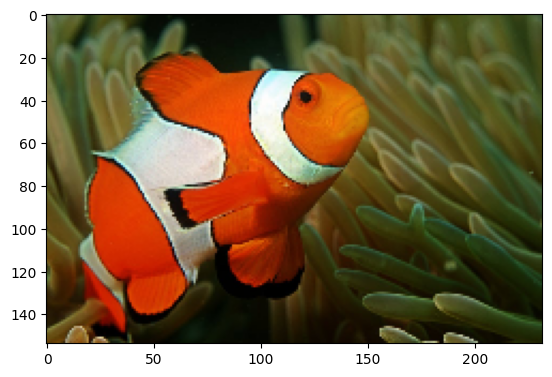

In [60]:
nemo = cv2.imread("input/nemo.jpg")
nemo = cv2.resize(nemo, (0, 0), fx=0.25, fy=0.25)
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

In [61]:
nemo.shape

(154, 232, 3)

In [62]:
pixels_list_rgb = nemo.reshape(-1, 3)
pixels_list_rgb.shape

(35728, 3)

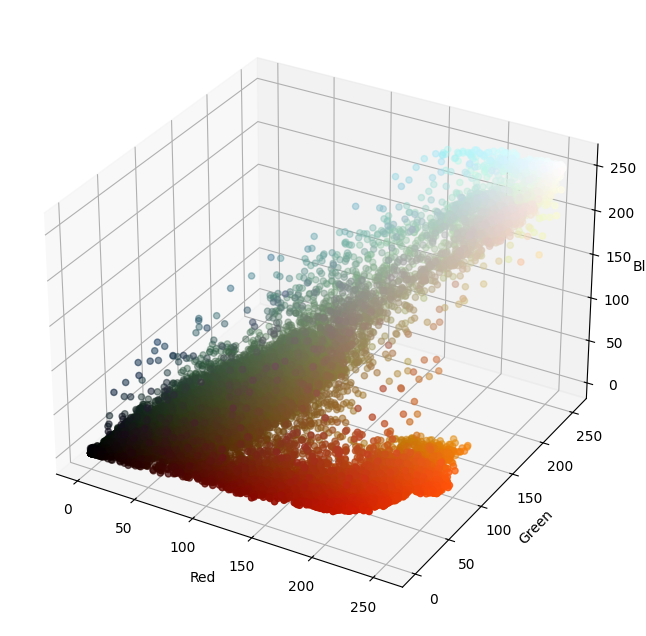

In [63]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(pixels_list_rgb[:, 0], pixels_list_rgb[:, 1], pixels_list_rgb[:, 2], c=pixels_list_rgb / 255)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

In [64]:
nemo_hsv = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
pixels_list_hsv = nemo_hsv.reshape(-1, 3)
pixels_list_hsv

array([[ 41,  56, 122],
       [ 40,  71, 122],
       [ 39,  88, 113],
       ...,
       [ 33, 240,  35],
       [ 34, 240,  33],
       [ 35, 233,  34]], dtype=uint8)

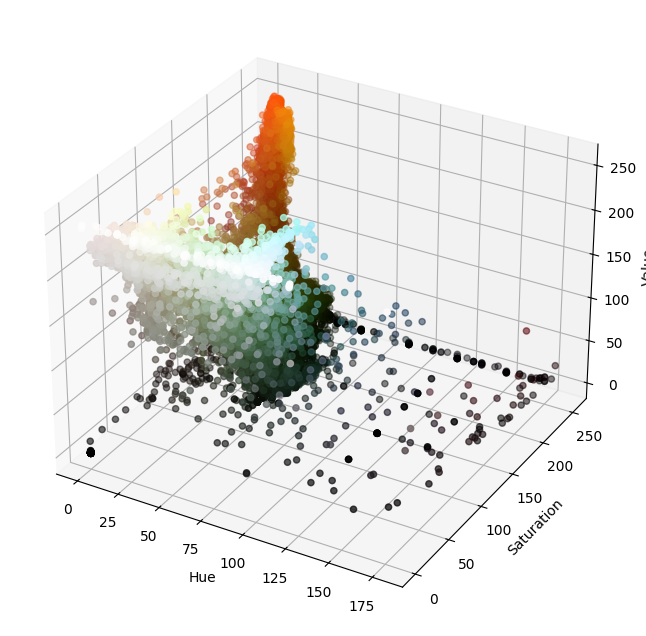

In [65]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(pixels_list_hsv[:, 0], pixels_list_hsv[:, 1], pixels_list_hsv[:, 2], c=pixels_list_rgb / 255)
ax.set_xlabel('Hue')
ax.set_ylabel('Saturation')
ax.set_zlabel('Value')
plt.show()

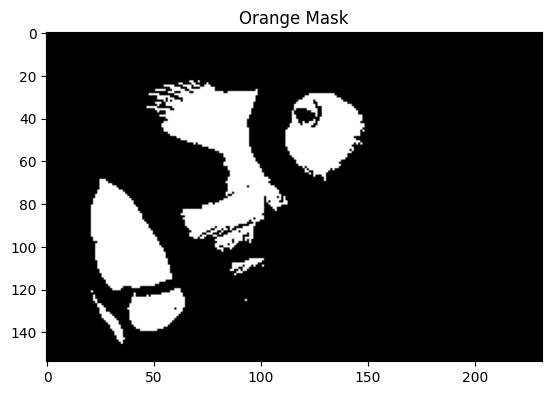

In [66]:
light_orange = (1, 90, 200)
dark_orange = (18, 255, 255)

mask_orange = cv2.inRange(nemo_hsv, light_orange, dark_orange)
plt.imshow(mask_orange, cmap='gray')
plt.title("Orange Mask")
plt.show()

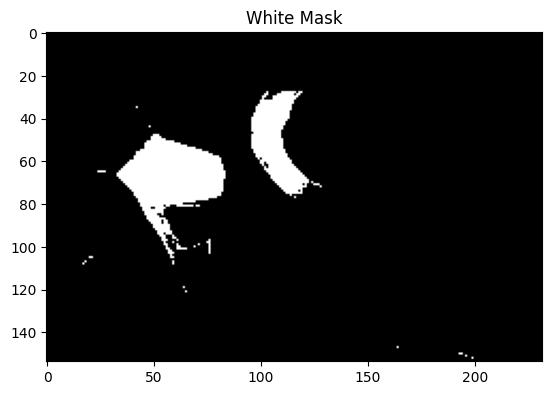

In [67]:
light_white = (0, 0, 190)
dark_white = (145, 60, 255)

mask_white = cv2.inRange(nemo_hsv, light_white, dark_white)
plt.imshow(mask_white, cmap='gray')
plt.title("White Mask")
plt.show()

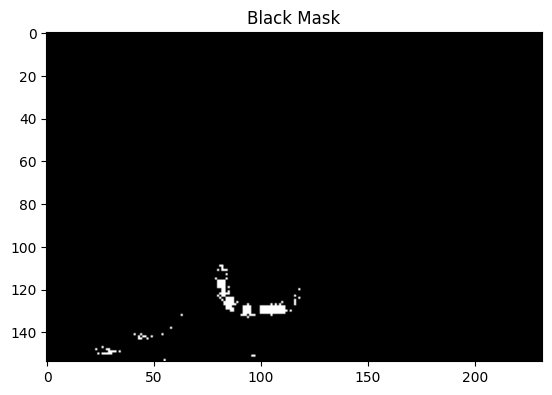

In [68]:
light_black = (0, 0, 0)
dark_black = (255,250,5)

mask_black = cv2.inRange(nemo_hsv, light_black, dark_black)
plt.imshow(mask_black, cmap='gray')
plt.title("Black Mask")
plt.show()

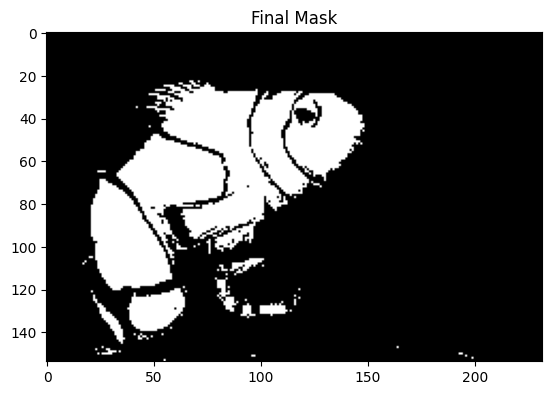

In [69]:
final_mask = mask_orange + mask_white + mask_black
plt.imshow(final_mask, cmap='gray')
plt.title("Final Mask")
plt.show()

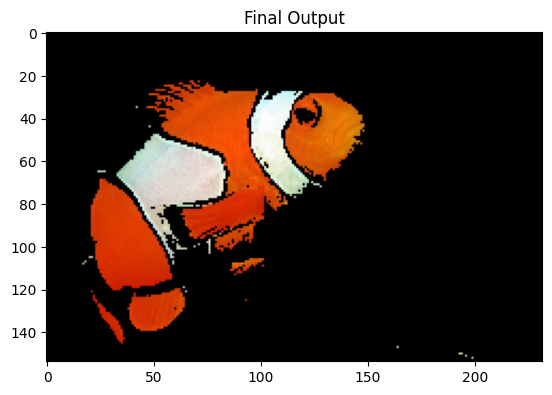

In [70]:
final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)
plt.imshow(final_result)
plt.title("Final Output")
plt.show()

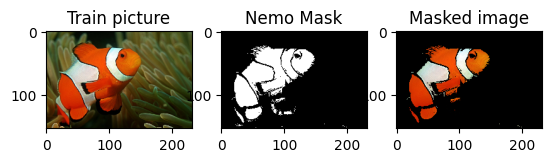

In [71]:
fig,axes=plt.subplots(nrows=1,ncols=3)
ax1,ax2,ax3=axes.flatten()

ax1.imshow(nemo,cmap='gray')
ax1.set_title('Train picture')

ax2.imshow(final_mask,cmap='gray')
ax2.set_title('Nemo Mask')

ax3.imshow(final_result)
ax3.set_title('Masked image')

plt.show()

In [72]:
final_mask.shape 

(154, 232)

In [73]:
X_train = pixels_list_hsv / 255
y_train = final_mask.reshape(-1, )

In [74]:
knn = KNN(3)
knn.fit(X_train, y_train)

In [75]:
knn.fit(X_train, y_train)

(89, 160, 3)

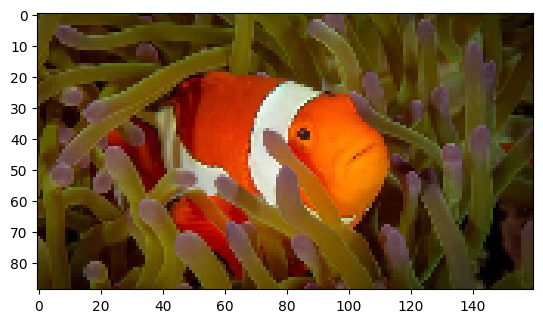

In [76]:
nemo_1 = cv2.imread("input/nemo_1.jpg")
nemo_1 = cv2.resize(nemo_1 , (0,0) , fx=0.25 , fy=0.25)
nemo_1 = cv2.cvtColor(nemo_1 , cv2.COLOR_BGR2RGB)
nemo_1_hsv = cv2.cvtColor(nemo_1 , cv2.COLOR_RGB2HSV)
plt.imshow(nemo_1, cmap="gray")
nemo_1_hsv.shape

In [77]:
X_test = nemo_1_hsv.reshape(-1,3) /255
X_test = np.array(X_test)

In [78]:
Y_pred = knn.predict(X_test)

In [79]:
Y_pred = np.array(Y_pred)

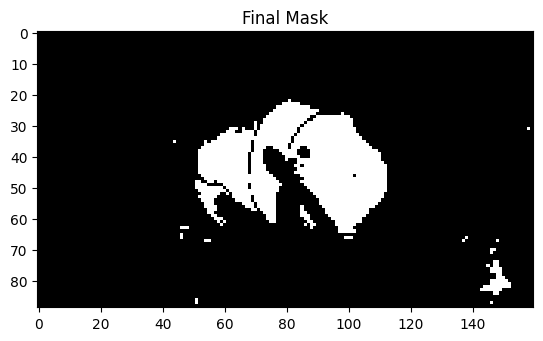

In [80]:
output_1 = Y_pred.reshape(nemo_1.shape[:2])
plt.imshow(output_1, cmap='gray')
plt.title("Final Mask")
plt.show()

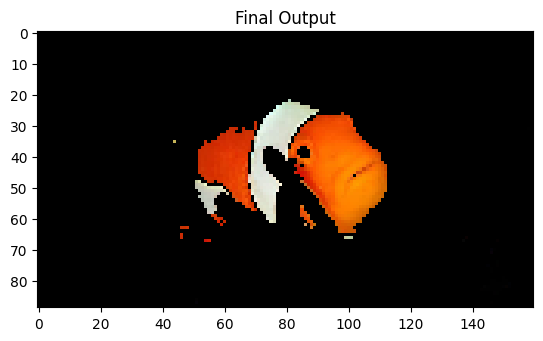

In [81]:
output_1 = output_1.astype("uint8")
final_result_1 = cv2.bitwise_and(nemo_1 , nemo_1 , mask=output_1)
plt.title("Final Output")
plt.imshow(final_result_1 , cmap="gray")

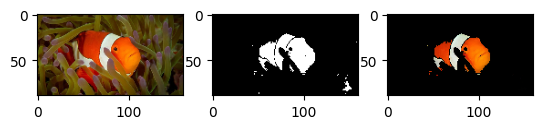

In [82]:
fig,axes=plt.subplots(nrows=1,ncols=3)
ax1,ax2,ax3=axes.flatten()
ax1.imshow(nemo_1,cmap='gray')

ax2.imshow(output_1,cmap='gray')

ax3.imshow(final_result_1)
plt.show()

(333, 500, 3)

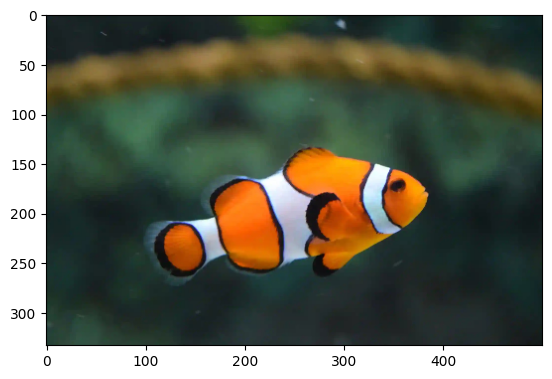

In [83]:
nemo_2 = cv2.imread("input/nemo_2.jpg")
nemo_2 = cv2.resize(nemo_2 , (0,0) , fx=0.25 , fy=0.25)
nemo_2 = cv2.cvtColor(nemo_2 , cv2.COLOR_BGR2RGB)
nemo_2_hsv = cv2.cvtColor(nemo_2 , cv2.COLOR_RGB2HSV)
plt.imshow(nemo_2, cmap="gray")
nemo_2_hsv.shape

In [84]:
X_test = nemo_2_hsv.reshape(-1,3) /255
X_test = np.array(X_test)

In [85]:
Y_pred = knn.predict(X_test)

In [86]:
Y_pred = np.array(Y_pred)

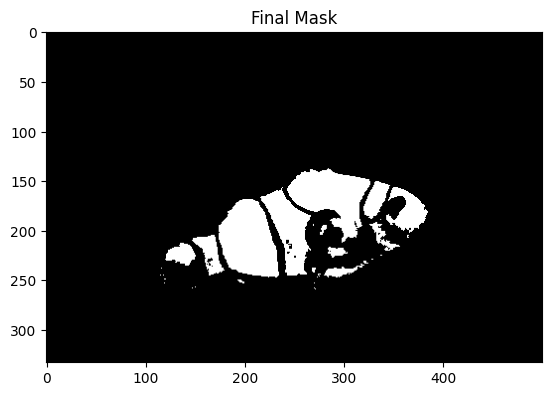

In [87]:
output_2 = Y_pred.reshape(nemo_2.shape[:2])
plt.imshow(output_2, cmap='gray')
plt.title("Final Mask")
plt.show()

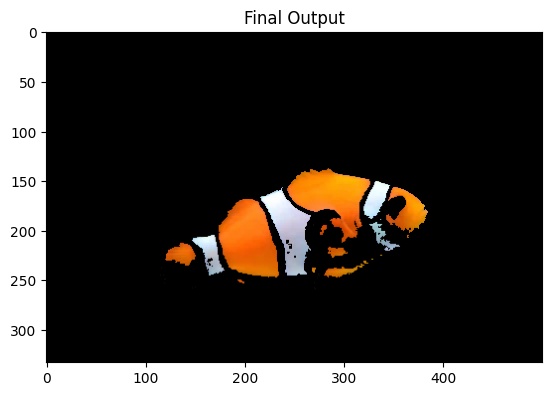

In [88]:
output_2 = output_2.astype("uint8")
final_result_2 = cv2.bitwise_and(nemo_2 , nemo_2 , mask=output_2)
plt.title("Final Output")
plt.imshow(final_result_2 , cmap="gray")

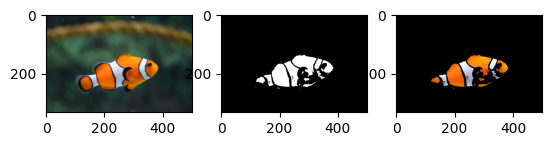

In [89]:
fig,axes=plt.subplots(nrows=1,ncols=3)
ax1,ax2,ax3=axes.flatten()
ax1.imshow(nemo_2,cmap='gray')

ax2.imshow(output_2,cmap='gray')

ax3.imshow(final_result_2)
plt.show()